In [1]:
# Importar bibliotecas
from PIL import Image, ImageChops, ImageFilter


In [4]:
# direcciones de las imagenes
ruta_x = 'C:/Users/rodrigo/Desktop/github/Canales de Youtube/Python Simplified/Imgage processing with Pillow/x.png'
ruta_o = 'C:/Users/rodrigo/Desktop/github/Canales de Youtube/Python Simplified/Imgage processing with Pillow/o.png'

# Importar la imagen
x = Image.open(ruta_x)
o = Image.open(ruta_o)

print('tamano de la imagen: ', x.size, ' estructura de color: ', x.mode)


tamano de la imagen:  (256, 256)  estructura de color:  RGB


(-0.5, 255.5, 255.5, -0.5)

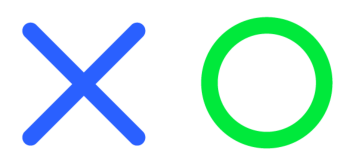

In [6]:
# desplegar ambas imagenes simultaneamente
from matplotlib import pyplot as plt
plt.subplot(121), plt.imshow(x)
plt.axis('off')
plt.subplot(122), plt.imshow(o)
plt.axis('off')


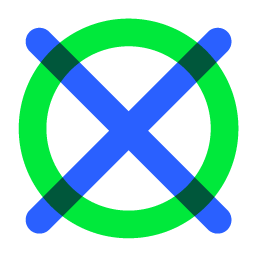

In [7]:
# como fusionar ambas imagenes?
combinado = ImageChops.multiply(x, o)
combinado

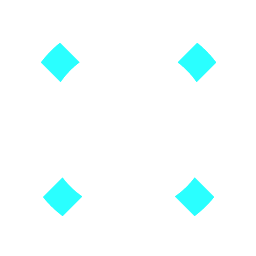

In [8]:
# Si se quieren observar las secciones que comparten en comun, se puede hacer con el siguiente comando
interseccion = ImageChops.add(x, o)
interseccion

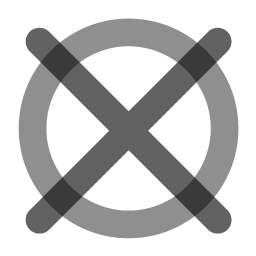

In [9]:
# convertir a escala de grises
gris = combinado.convert('L') # escala de grises con 'L', negro y blanco con '1'
gris

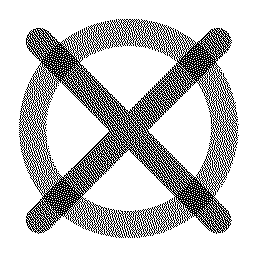

In [10]:
# imagen en negro y blanco (aunque no se ve muy bien)
NyB = combinado.convert('1')
NyB

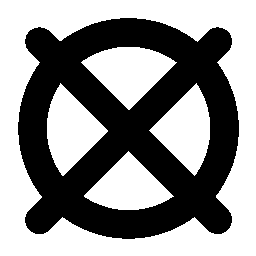

In [11]:
# para hacer esto de forma manual
pixel = combinado.load()  # contendra todos los pixeles

for fila in range(combinado.size[0]): 
    for columna in range(combinado.size[1]):
        if pixel[fila, columna] != (255, 255, 255): # si el color no es blanco, cambialo a negro
            pixel[fila, columna] = (0, 0, 0)
            
combinado

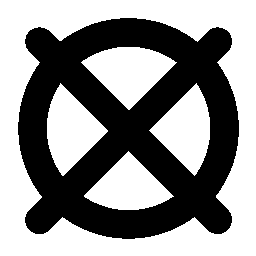

In [14]:
# luego si se quiere hacer esto mismo para el gris
## recordar que la imagen gris solo maneja un canal de color

pixel = gris.load()  # contendra todos los pixeles

for fila in range(gris.size[0]): 
    for columna in range(gris.size[1]):
        if pixel[fila, columna] != 255: # si el color no es blanco, cambialo a negro
            pixel[fila, columna] = 0
            
gris

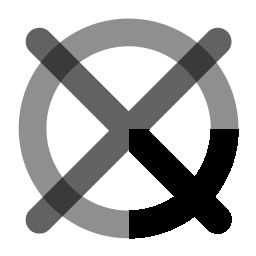

In [20]:
# volvemos a cargar la imagen gris
combinado = ImageChops.multiply(x, o)
gris = combinado.convert('L') # escala de grises con 'L', negro y blanco con '1'

# luego si queremos solo colorear una parte de la imagen
pixel = gris.load()  # contendra todos los pixeles

for fila in range(gris.size[0]): 
    for columna in range(gris.size[1]):
        if pixel[fila, columna] != 255 and fila > 128 and columna > 128: 
            pixel[fila, columna] = 0
            
gris

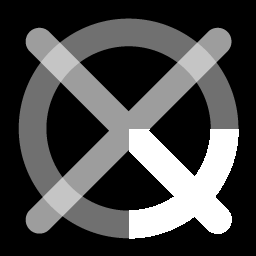

In [21]:
# otra funcion que nos puede ser util es invertir los colores
inverso = ImageChops.invert(gris)
inverso

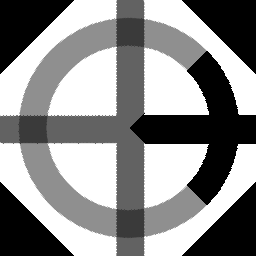

In [22]:
# Otra funcio que puede ser util es girar o rotar
girado = gris.rotate(45)
girado

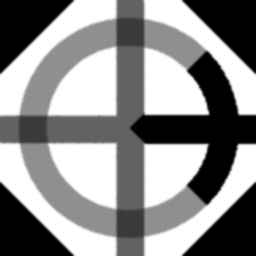

In [23]:
# Por ultimo, tambien podemos difuminar los bordes de la figura
difuminado = girado.filter(ImageFilter.GaussianBlur(radius=1))
difuminado

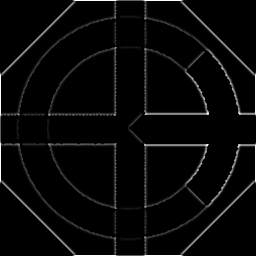

In [24]:
# luego, si queremos solo mostrar los bordes
bordes = difuminado.filter(ImageFilter.FIND_EDGES)
bordes

## Encontre bien interesante esta biblioteca, y mientras desarrollaba estos ejercicios, me preguntaba si seria posible **sobreponer las imagenes**



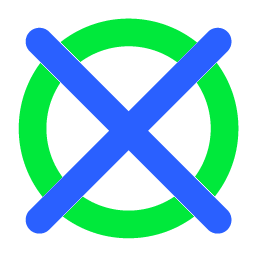

In [32]:
x = Image.open(ruta_x)
o = Image.open(ruta_o)

# por ejemplo, intentemos sobrepones la x por sobre el o
pixel_x = x.load()
pixel_o = o.load()


# si vamos a sobreponer la 'x' encima de 'o', entonces usaremos 'o' de fondo
for fila in range(o.size[0]):
    for columna in range(o.size[1]):
        if pixel_x[fila, columna] != (255, 255, 255): # si el pixel no es blanco en x, reeplaze ese pixel en o 
            pixel_o[fila, columna] = pixel_x[fila, columna] 

o
